<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/PopulationDensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

Using TensorFlow backend.


In [2]:
print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content
Cloning into 'Covid_19_predictor'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 18), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/Covid_19_predictor
Already up to date.


In [0]:
df = pd.read_csv('data.csv', date_parser=['dateRep'])
df_population_density = pd.read_csv('PopulationDensity.csv', engine='python')

In [4]:
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina', 'Botswana', 'Brazil', 'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands', 'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland_Islands_(Malvinas)', 'Faroe_Islands', 'Fiji', 'Finland', 'F

In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]

In [0]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  total_days = len(country_wise_deaths[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)

In [0]:
cases_list = []
deaths_list = []
population_density_list = []

for country in countries:
  population_density = df_population_density[df_population_density['Country Name'] == country]['Population Density'].values
  cases_list.append(cumulative_country_wise_cases[country][-1])
  deaths_list.append(cumulative_country_wise_deaths[country][-1])
  population_density_list.append(population_density)

In [0]:
def removecomma(s):
  s1 = ""
  for i in s:
    if i != ",":
      s1+=i
  return int(s1)

In [0]:
popdense =[]
for i in range(len(population_density_list)):
  try:
    popdense.append(removecomma(population_density_list[i][0]))
  except:
    popdense.append(0)

<function matplotlib.pyplot.show>

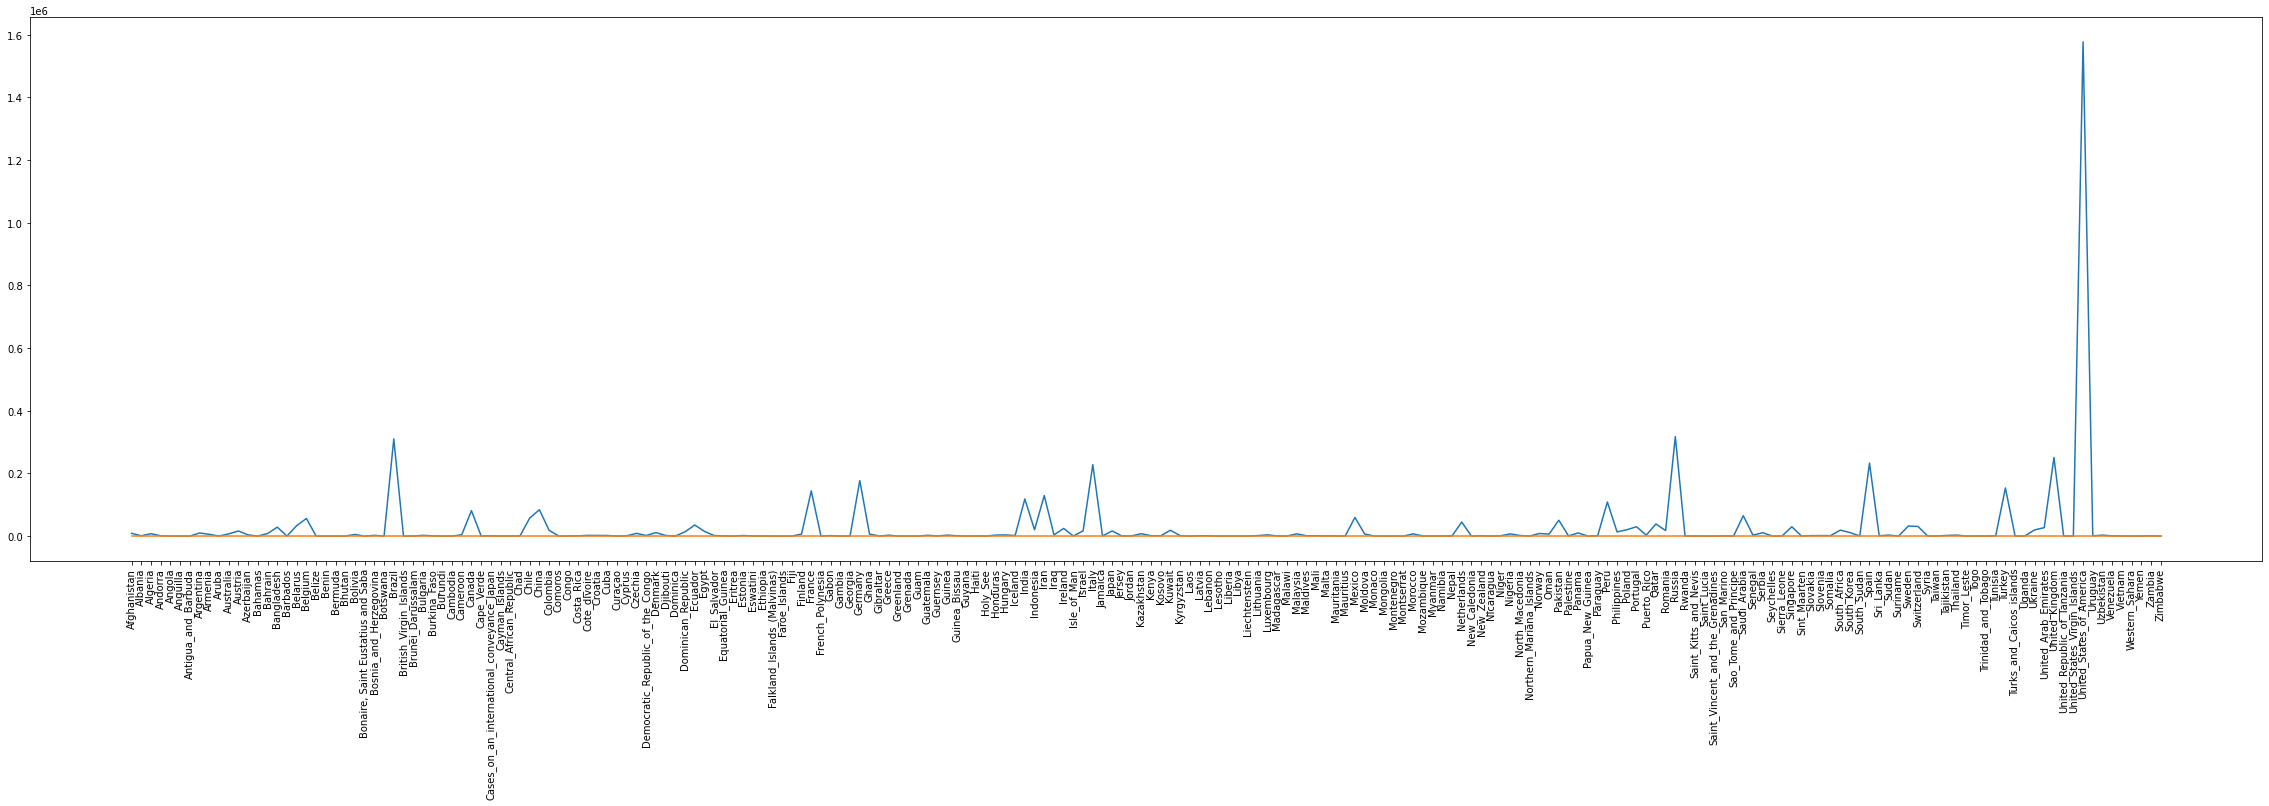

In [10]:
plt.figure(figsize = (40,10))
plt.plot(countries, cases_list)
plt.plot(countries, popdense)
plt.xticks(rotation=90)

plt.show

<function matplotlib.pyplot.show>

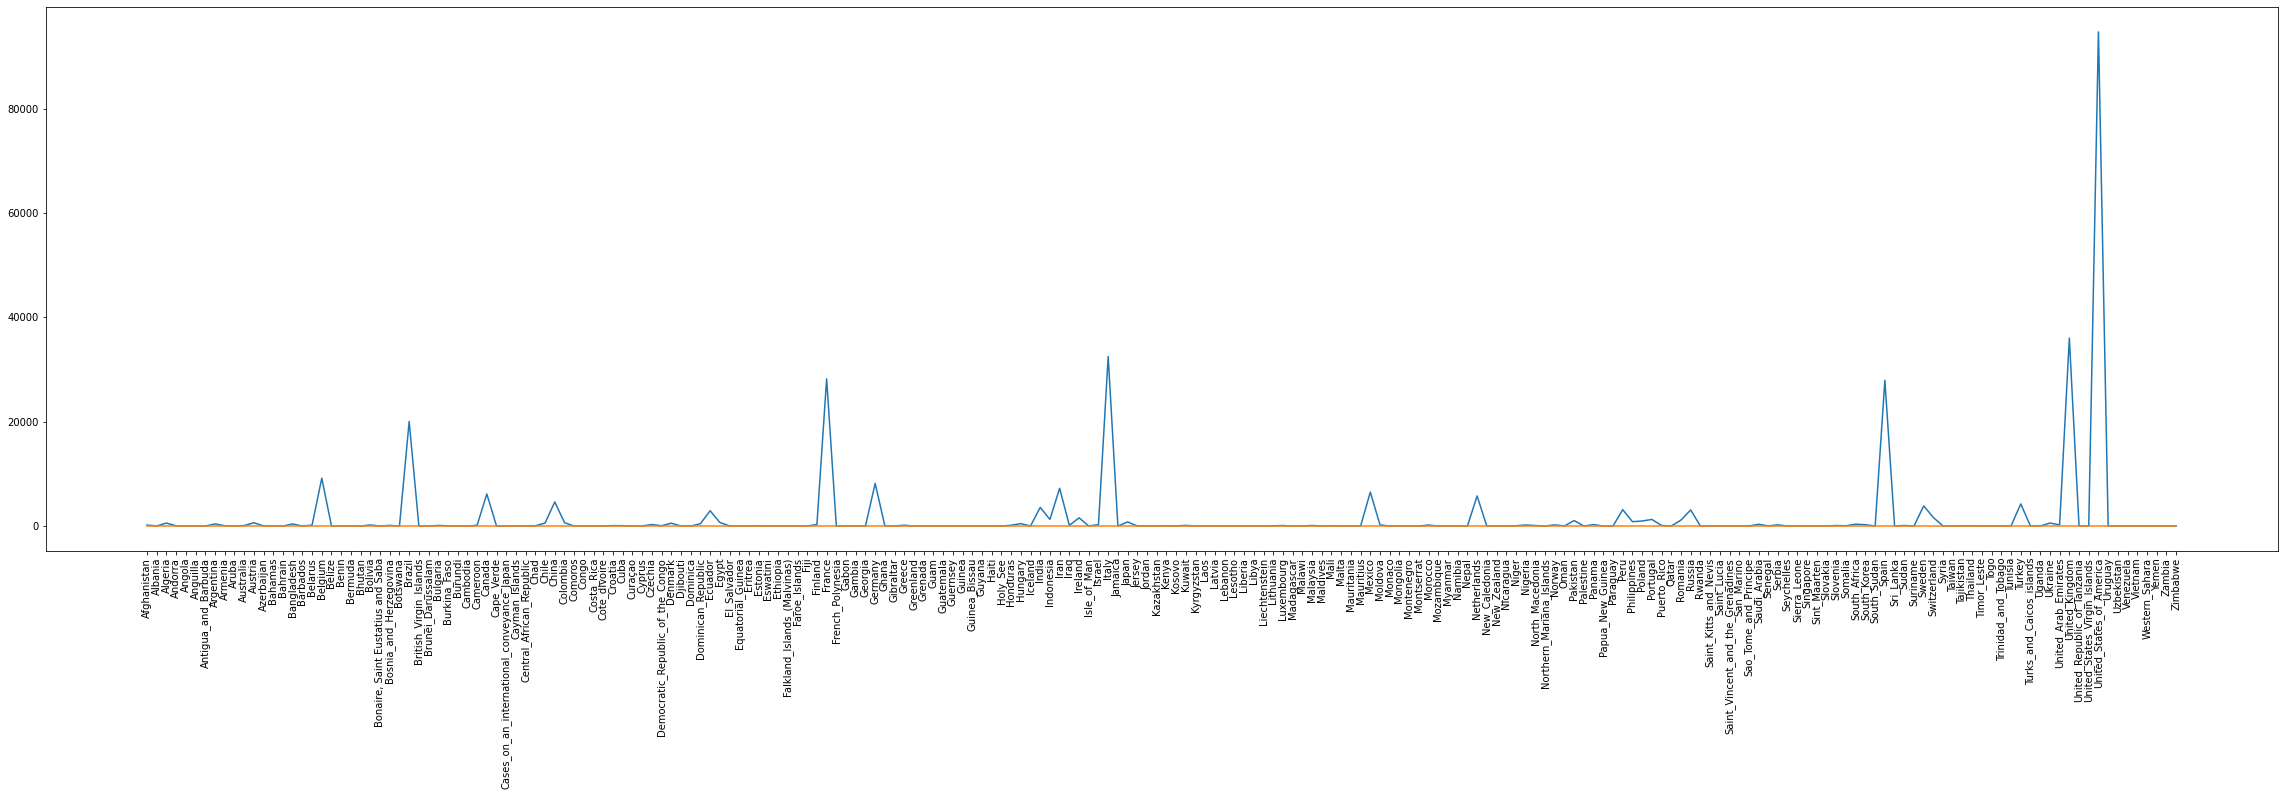

In [11]:
plt.figure(figsize = (40,10))
plt.plot(countries, deaths_list)
plt.plot(countries, popdense)
plt.xticks(rotation=90)

plt.show